In [2]:
# Importando datasets para las pruebas
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# Viendo dimensiones de los datos de entranamiento
train_images.shape
len(train_labelsien)
train_labels.shape
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# Viendo las dimensiones de los datos de testing
test_images.shape

(10000, 28, 28)

In [1]:
# Prepara la red neuronal
from keras import models

Using TensorFlow backend.


In [2]:
from keras import layers

In [3]:
network = models.Sequential()

In [6]:
# Se encarga de procesar la imagen para convertirlo en otro tipo de datos 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))

In [7]:
# Se encarga de dar un la probabilidad para cada entrada de pertenecer a un valor entre 0-9. 
# Es decir la probabilidad de que sea un 0, la probabilidad de que sea un 1, etc
network.add(layers.Dense(10, activation='softmax'))

In [8]:
# Establecer loss function, optimizer y la métrica para evaluar
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Prepara las imagenes para el algoritmo
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 25

In [11]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# Ejecuta el algoritmo (10 pasos)
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.0306 - acc: 0.9912     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0269 - acc: 0.9922     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0224 - acc: 0.9942     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0200 - acc: 0.9948     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0172 - acc: 0.9952     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0153 - acc: 0.9960     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0144 - acc: 0.9961     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.0121 - acc: 0.9968     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.0110 - acc: 0.9973     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0094 - acc: 0.9974     


In [18]:
# Prepara los datos de test para Evaluar el modelo
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 25
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9312/10000 [==========================>...] - ETA: 0s

In [19]:
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.9812


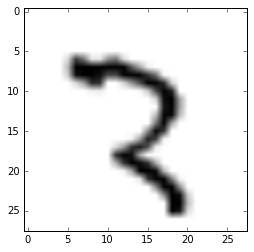

In [4]:
digit = train_images[500]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()